In [70]:
import selenium


In [79]:
import pandas as pd

In [71]:
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [72]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


C:\Users\tofee\AppData\Local\Temp\ipykernel_10232\141190678.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


In [73]:
from selenium.webdriver.common.by import By

In [74]:
url = "https://www.tripadvisor.com/Hotel_Review-g60634-d114075-Reviews-or80-Sheraton_Maui_Resort_Spa-Lahaina_Maui_Hawaii.html"

In [75]:
driver.get(url)

In [76]:
names_list=[]
titles_list=[]
reviews_list=[]
for i in range(0, 10):
    names=driver.find_elements(By.XPATH,"(//a[@class='ui_header_link uyyBf'])")
    for name in range(len(names)):
        names_list.append(names[name].text)

    titles=driver.find_elements(By.XPATH,"(//a[@class='Qwuub']/span)")
    for title in range(len(titles)):
        titles_list.append(titles[title].text)

    reviews = driver.find_elements(By.XPATH, "(//q[@class='QewHA H4 _a']/span)") 
    for review in range(len(reviews)):
        reviews_list.append(reviews[review].text)

    driver.find_element(By.XPATH, "//a[@class='ui_button nav next primary ']").click()
    time.sleep(2)
    
driver.quit()

In [78]:
data=list(zip(names_list,titles_list,reviews_list))

In [80]:
reviews=pd.DataFrame(data,columns=['Reviewer','Review Title','Review'])
reviews.head(5)


,Reviewer,Review Title,Review
0,Lynette,Do your homework folks!!!,The rooms are comfortable and the property is ...
1,Netanders,Sheraton Maui was the last hotel on our group ...,Our group tour had the Sheraton Maui for our l...
2,Jan H,We would stay here again,We loved our stay at the Sheraton. The staff w...
3,Janice B,"Beautiful grounds, terrible rooms","Upon arrival our reservation had been ""upgrade..."
4,alison303,I want to move into the Moana building…,Another great experience at the Sheraton Maui....


In [81]:
only_reviews=reviews.iloc[:,2].values
hotel_reviews=pd.DataFrame({'reviews':only_reviews})

In [82]:
hotel_reviews.head()

,reviews
0,The rooms are comfortable and the property is ...
1,Our group tour had the Sheraton Maui for our l...
2,We loved our stay at the Sheraton. The staff w...
3,"Upon arrival our reservation had been ""upgrade..."
4,Another great experience at the Sheraton Maui....


In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader=SentimentIntensityAnalyzer()
hotel_reviews['Compound']=hotel_reviews['reviews'].apply(lambda x:vader.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tofee\AppData\Roaming\nltk_data...


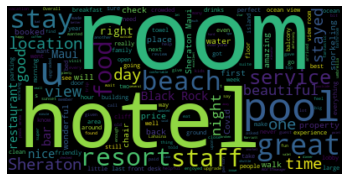

In [85]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
text=" ".join([rev for rev in hotel_reviews['reviews']])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [89]:
def apply_sentiment(score):
    if(score>0):
        return 'Positive'
    elif score==0:
        return 'Neutral'
    else:
        return 'Negative'
hotel_reviews['sentiment']=hotel_reviews['Compound'].apply(apply_sentiment)


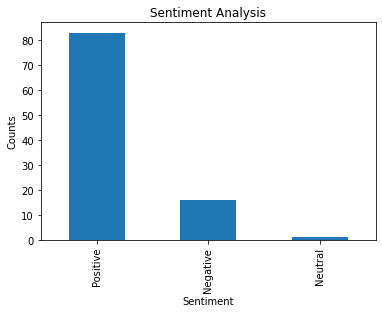

In [91]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
hotel_reviews['sentiment'].value_counts().plot(kind='bar')
plt.show()

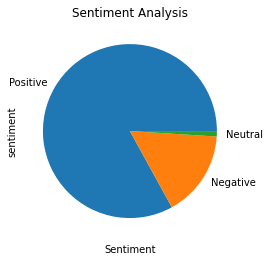

In [92]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
hotel_reviews['sentiment'].value_counts().plot(kind='pie')
plt.show()